In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")

In [3]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# EDA 

In [5]:
print("shape of data:" , df.shape)

print("************")

print("Missing values","/n",df.isna().sum())

print("************")

print(df.info())

shape of data: (1197, 15)
************
Missing values /n date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64
************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   target

In [6]:
df.drop(columns = ["date"] , inplace = True)

#  Handling Missing Value

In [7]:
df["wip"].dtypes

dtype('float64')

In [8]:
df["wip"] = df["wip"].fillna(0)

In [9]:
df["wip"] = df["wip"].astype("int64")

In [10]:
df.isna().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

#  Other columns Exploration

In [11]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


In [12]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [13]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

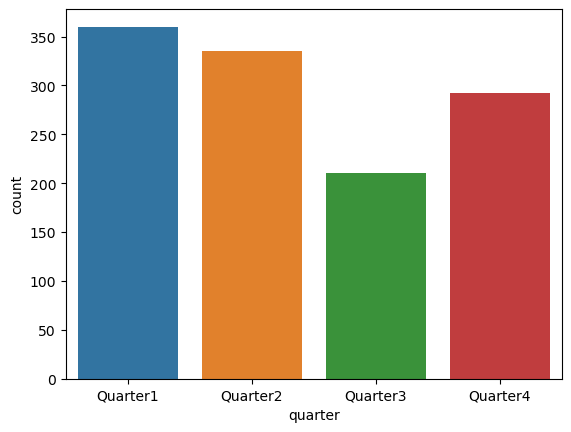

In [26]:
value_quarter = pd.DataFrame(df["quarter"].value_counts()).reset_index()
value_quarter.columns = ["quarter" , 'count']
#print(value_quarter)
#sns.barplot(data = value_quarter , x = 'quarter' , y = 'count')
sns.countplot(x='quarter', data=df)
plt.show()

In [15]:
# Change Quarter5 to Quarter4
df["quarter"] = df["quarter"].replace({"Quarter5" : "Quarter4"})

In [16]:
# Department
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [17]:
# striping the space

df["department"] = df["department"].str.strip()

In [30]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


In [32]:
# sns.countplot(x='department', data=df , hue = "day")
# plt.show()

In [23]:
# Friday seems to be holiday

In [26]:
# Actual Productivity is the Target column which has % value ranging from 0 - 1

# Checking Multi Collinearity

<Axes: >

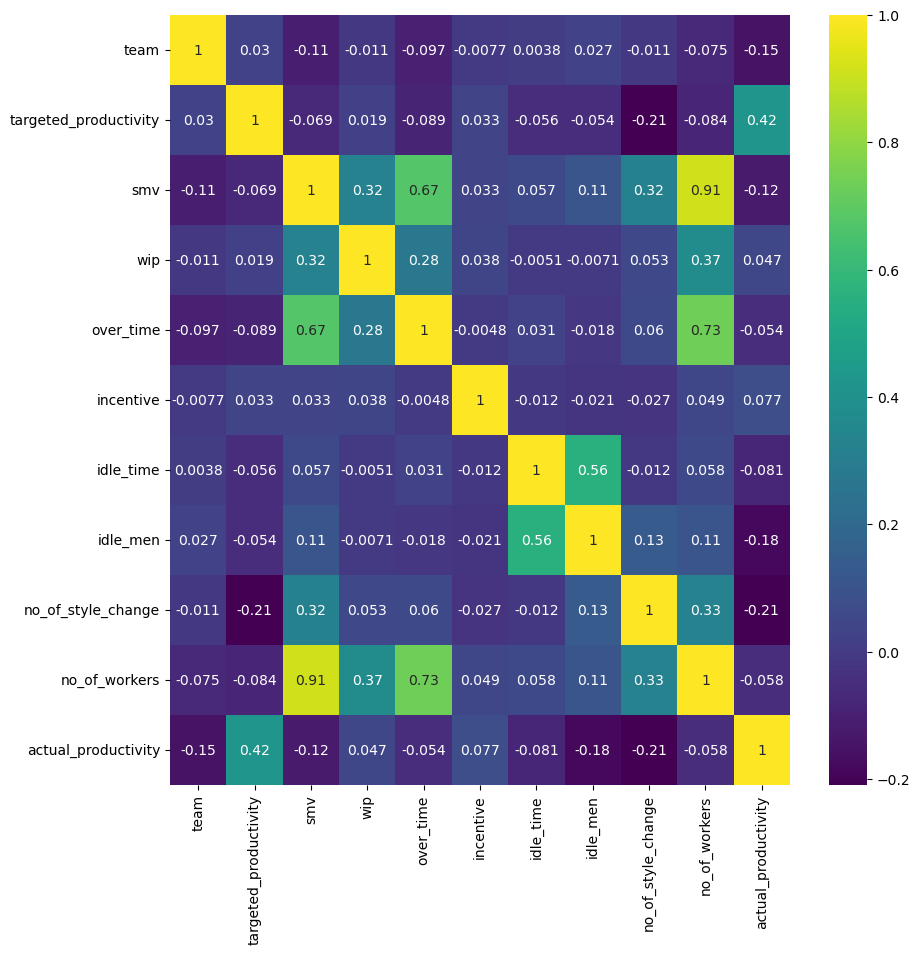

In [33]:
df_corr = df.select_dtypes(exclude = "object").corr()
plt.figure(figsize = (10,10))
sns.heatmap(df_corr , annot = True , cmap = "viridis")

In [34]:
# no.of workers and minute allocated are correlated more . But not ignoring any column as of now.

<Axes: >

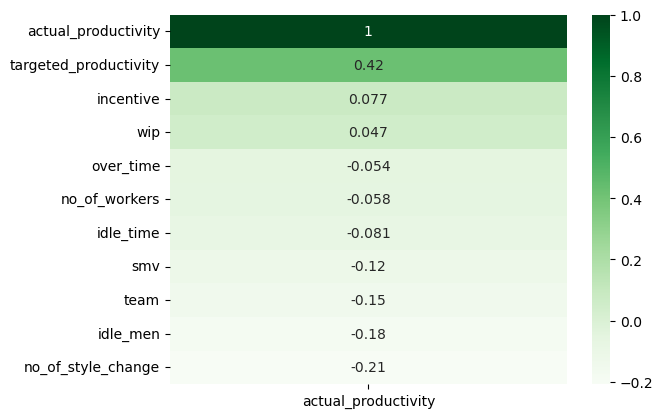

In [35]:

sns.heatmap(df_corr[["actual_productivity"]].sort_values(by = 'actual_productivity' , 
                                                         ascending = False) , annot =True , cmap ="Greens")

In [36]:
df.drop(columns = "day" , inplace =True)

In [37]:
df.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


# Outliers

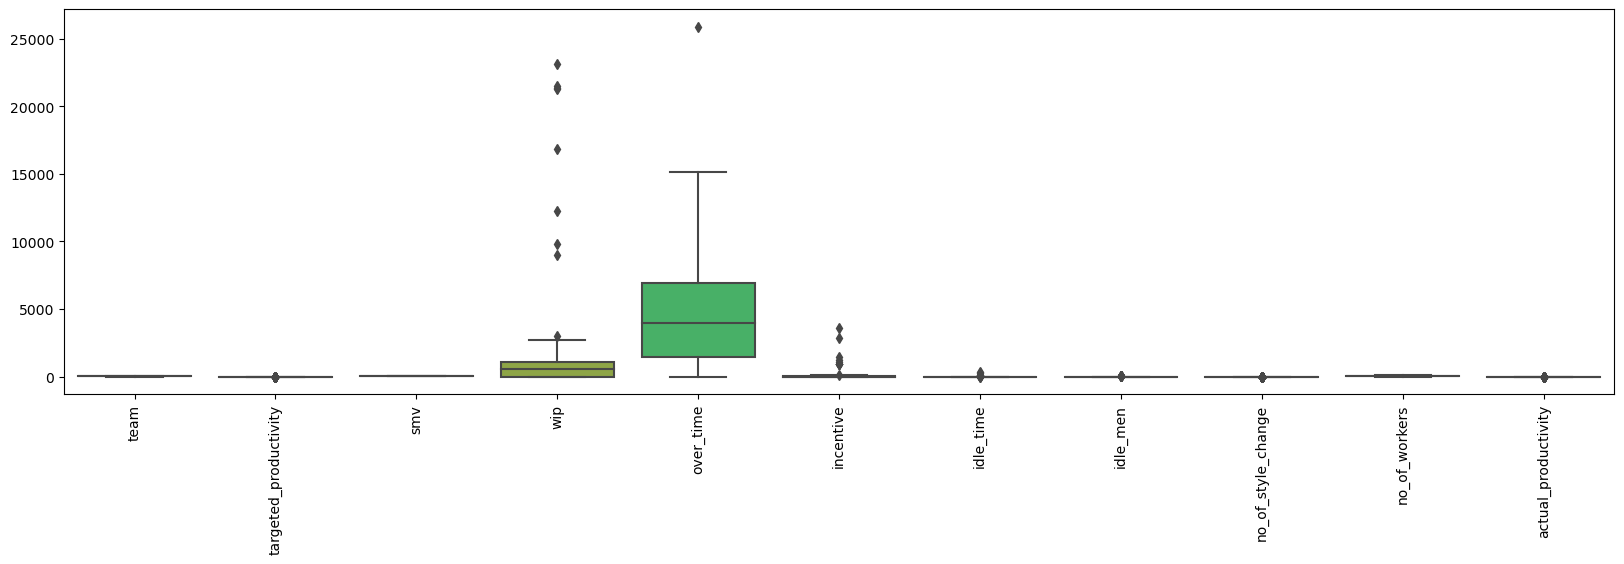

In [38]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, orient ='v')
plt.xticks(rotation=90)
plt.show()

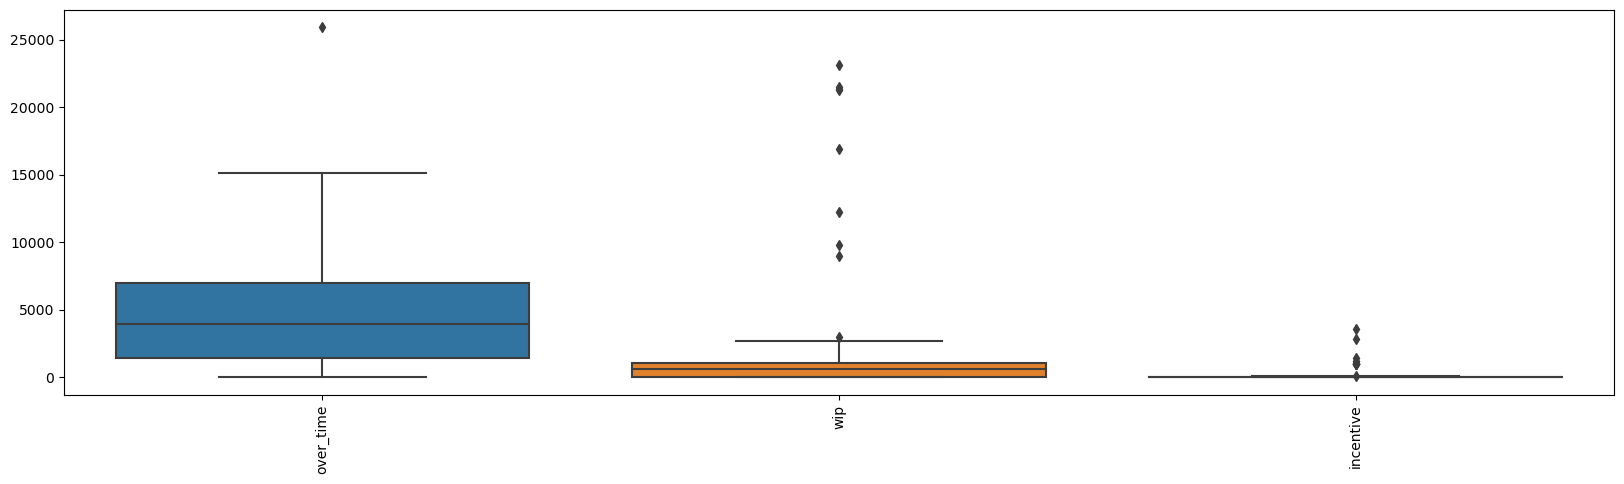

In [39]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df[["over_time","wip","incentive"]], orient ='v')
plt.xticks(rotation=90)
plt.show()

# Handling Outliers

In [40]:
Q1 = df["over_time"].quantile(0.25)
Q3 = df["over_time"].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
upper_limit = Q3 +1.5*IQR
print(upper_limit)

1440.0
6960.0
5520.0
-6840.0
15240.0


In [41]:
# Function to handle outliers
def outlier_IQR(data , cols):
    
    for col in cols:
        
        print(col)
    
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_limit = Q1 - 1.5*IQR
        print("lower limit for column",col,"is:",lower_limit)
    
        upper_limit = Q3 + 1.5*IQR
        print("upper limit for column",col,"is:",upper_limit)
    
        data = data[(df[col] > lower_limit) & (data[col] < upper_limit)]
        
    
    return(data)
    

In [42]:
outlier_cols = ["over_time" , "wip" ,"incentive"]
df_outlier = outlier_IQR(df , outlier_cols)

over_time
lower limit for column over_time is: -6840.0
upper limit for column over_time is: 15240.0
wip
lower limit for column wip is: -1624.875
upper limit for column wip is: 2708.125
incentive
lower limit for column incentive is: -75.0
upper limit for column incentive is: 125.0


In [45]:
df_outlier.shape

(1176, 13)

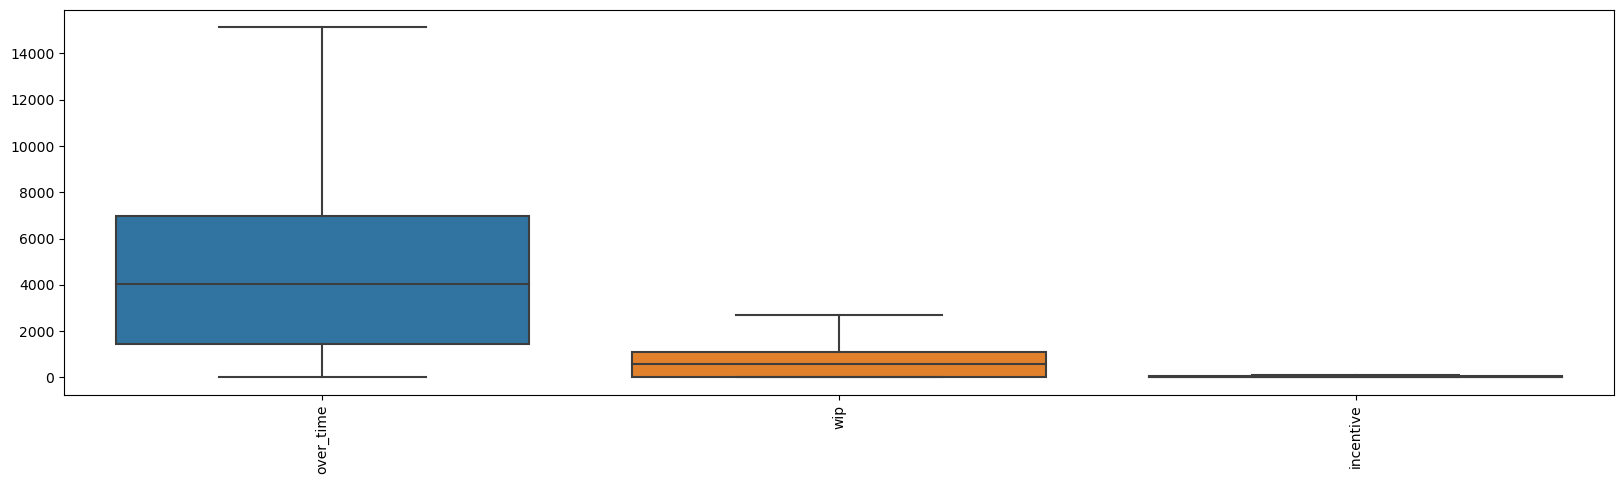

In [46]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df_outlier[["over_time","wip","incentive"]], orient ='v')
plt.xticks(rotation=90)
plt.show()

# Preprocessing 

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [76]:
df_outlier["quarter"] = df_outlier['quarter'].str.extract(r'(\d)').astype(int)

In [153]:
# Have X and Y dataframes for Model Building
X = df_outlier.drop(columns = ["actual_productivity"])
y = df_outlier["actual_productivity"]

In [154]:
X.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1,sweing,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0
1,1,finishing,1,0.75,3.94,0,960,0,0.0,0,0,8.0
2,1,sweing,11,0.80,11.41,968,3660,50,0.0,0,0,30.5
3,1,sweing,12,0.80,11.41,968,3660,50,0.0,0,0,30.5
4,1,sweing,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0


In [158]:
cat_cols = df_outlier.select_dtypes("object").columns
print("categorical columns are:" , cat_cols)
for i in cat_cols:
    X[i] = le.fit_transform(X[i])

categorical columns are: Index(['department'], dtype='object')


In [159]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y ,test_size =0.3 , random_state= 30)
columns_x = xtrain.columns
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape


((823, 12), (353, 12), (823,), (353,))

In [162]:
xtrain.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
443,4,1,4,0.80,22.52,1016,10170,60,0.0,0,0,56.5
418,4,0,1,0.70,3.94,0,1440,0,0.0,0,0,8.0
321,3,1,6,0.80,11.41,1028,4380,50,0.0,0,0,31.0
1163,2,1,9,0.75,18.79,1247,6240,45,0.0,0,0,52.0
701,2,0,4,0.70,4.15,0,1800,0,0.0,0,0,15.0


In [163]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [164]:
xtrain  = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)
xtrain.columns = columns_x
xtest.columns = columns_x

In [165]:
import pickle
pickle.dump(ss , open('scaling.pkl' , 'wb'))

#  Function to run different algorithms and getting their metrics

In [166]:
def model_metrics(algos):
    
    res = pd.DataFrame()
    df_pred_all = pd.DataFrame()
    
    
    for algo in algos:
        
        #print(algo)
        
        algo.fit(xtrain , ytrain)
        
        y_pred_train = algo.predict(xtrain)
        y_pred = algo.predict(xtest)


        df_pred = pd.DataFrame({"actual" : ytest ,
                                "predicted" : y_pred,
                               "algo" : str(algo).split("(")[0]})
                
        df_pred_train = pd.DataFrame({"actual" : ytrain ,
                                "predicted_train" : y_pred_train})
        
        #df_pred_all = df_pred_all.append(df_pred)
        df_pred_all = pd.concat([df_pred_all, df_pred], ignore_index=True)
        
        mse = mean_squared_error(df_pred["actual"] , df_pred["predicted"])
        mae = mean_absolute_error(df_pred["actual"] , df_pred["predicted"])
        r2score = r2_score(df_pred["actual"] , df_pred["predicted"])
        
    # Adjusted R-square : 1 - [(1-Rsquare)*(n - 1) / (n - k - 1)] n = no.of sample , k =no.of.features
        #adj_r2score = 1 - [((1-r2score)*(len(ytest)-1))/(len(ytest)-xtest.shape[1]-1)]
        
        mse_train = mean_squared_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
        mae_train = mean_absolute_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
        r2score_train = r2_score(df_pred_train["actual"] , df_pred_train["predicted_train"])
       
        
        df_metric = pd.DataFrame({'model' : str(algo).split("(")[0],
                                  "mse" : [mse], 
                                  #"mae" : [mae],
                                  "r2score" : [r2score],
                                  "mse_train" :[mse_train],
                                  #"mae_train" :[mae_train],
                                 "r2score_train" : [r2score_train]
                                 })

        
        #res = res.append(df_metric)
        res = pd.concat([res, df_metric], ignore_index=True)
     
    print(res)
    #print(tabulate(res , headers='keys', tablefmt='psql'))
    
    print("The Lowest MSE model is :")
    model_good = pd.DataFrame(res.iloc[res["mse"].argmin()]).T.set_index('model')
    print(tabulate(model_good , headers ='keys' , tablefmt = 'psql'))

    return df_pred_all
        

In [167]:
# def model_metrics(algos):
#     res = pd.DataFrame()
    
    
#     for algo in algos:
        
#         #print(algo)
        
#         algo.fit(xtrain , ytrain)
        
#         y_pred_train = algo.predict(xtrain)
#         y_pred = algo.predict(xtest)

        
#         df_pred = pd.DataFrame({"actual" : ytest ,
#                                 "predicted" : y_pred})
        
#         df_pred_train = pd.DataFrame({"actual" : ytrain ,
#                                 "predicted_train" : y_pred_train})
        
#         mse = mean_squared_error(df_pred["actual"] , df_pred["predicted"])
#         mae = mean_absolute_error(df_pred["actual"] , df_pred["predicted"])
        
#         mse_train = mean_squared_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
#         mae_train = mean_absolute_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
#         #print(mse_train , mae_train)
        
#         #r2score = r2_score(df_pred["actual"] , df_pred["predicted"])
       
        
#         df_metric = pd.DataFrame({'model' : str(algo),
#                                   "mse" : [mse], 
#                                   "mae" : [mae],
#                                   "mse_train" :[mse_train],
#                                   "mae_train" :[mae_train]
#                                   #"r2_score" : [r2score]
#                                  })
#         res = res.append(df_metric)
        
#         #plt.figure(figsize=(8, 6))
        
        
        
#         plt.subplot(1, 2, 1)  # Create a subplot for test data regplot
#         sns.regplot(data=df_pred, x="actual", y="predicted", label=str(algo))
#         plt.title("Actual vs Predicted - Test Data")
        
#         plt.subplot(1, 2, 2)  # Create a subplot for train data regplot
#         sns.regplot(data=df_pred_train, x="actual", y="predicted_train", label=str(algo))
#         plt.title("Actual vs Predicted - Train Data")
        
#         plt.tight_layout()  # Adjust the spacing between subplots
        

        
#     plt.legend() 
#     return res.set_index('model')

        

In [168]:
val = model_metrics([lr , rf , gb , xgb])

                       model       mse   r2score  mse_train  r2score_train
0           LinearRegression  0.021653  0.316585   0.017530       0.407366
1      RandomForestRegressor  0.017633  0.443488   0.003424       0.884253
2  GradientBoostingRegressor  0.016841  0.468474   0.009943       0.663840
3               XGBRegressor  0.018265  0.423526   0.002107       0.928764
The Lowest MSE model is :
+---------------------------+-----------+-----------+-------------+-----------------+
| model                     |       mse |   r2score |   mse_train |   r2score_train |
|---------------------------+-----------+-----------+-------------+-----------------|
| GradientBoostingRegressor | 0.0168409 |  0.468474 |  0.00994328 |         0.66384 |
+---------------------------+-----------+-----------+-------------+-----------------+


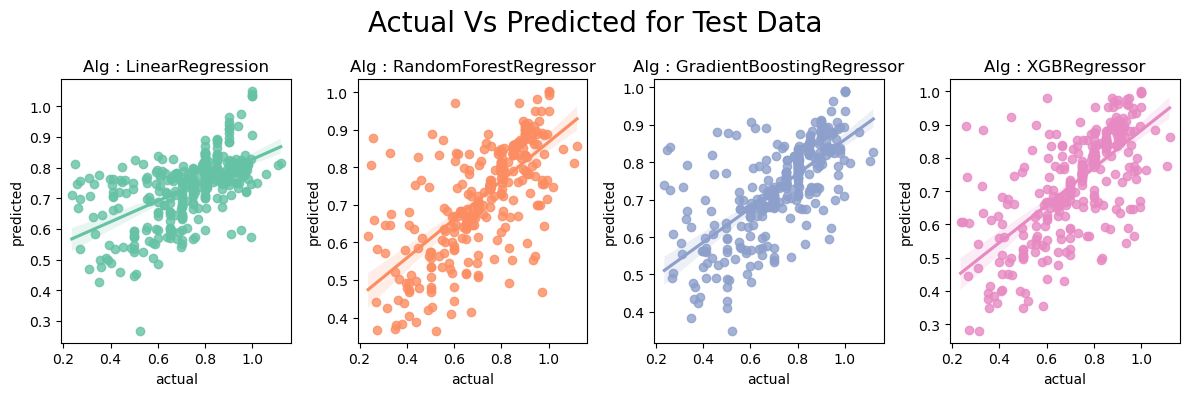

In [169]:
# Create subplots

models = val['algo'].unique()
#print(models)

fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(12, 4))

palette = sns.color_palette('Set2', n_colors=len(models))

for i, category in enumerate(models):
    ax = axes[i]
    subset = val[val['algo'] == category]
    sns.regplot(x='actual', y='predicted', data=subset, ax=ax, color=palette[i])
    ax.set_title(f'Alg : {category}')


plt.suptitle("Actual Vs Predicted for Test Data" , fontsize = 20)
plt.tight_layout()

# Assumptions

Text(0.5, 1.0, 'Distribution of Residuals for Gradient Boost model')

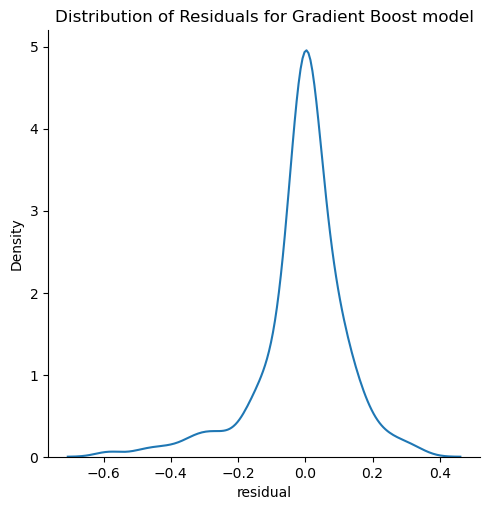

In [211]:
res_gb = val[val["algo"].str.contains("Gradient")]
res_gb["residual"] = res_gb["actual"] - res_gb["predicted"]
## Plot this residuals
sns.displot(res_gb["residual"] ,kind="kde")
plt.title("Distribution of Residuals for Gradient Boost model")


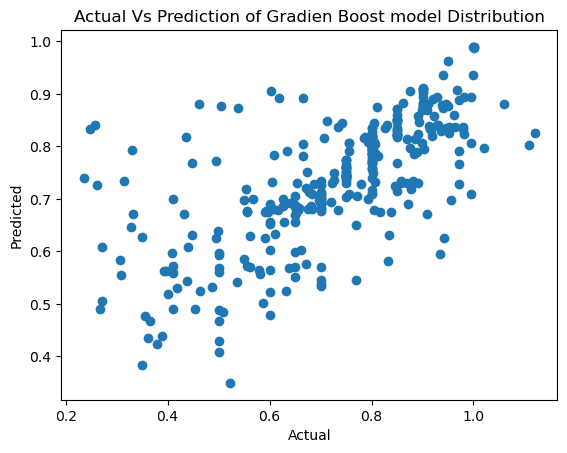

In [212]:
plt.scatter(data=res_gb, x="actual", y="predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Prediction of Gradien Boost model Distribution")
plt.show()


In [213]:
# lr Feature Importance
feature_importance_lr = lr.coef_

importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_lr})

importance_lr = importance_lr.sort_values(by='Importance', ascending=False)
#print(importance_lr)
# RF Feature Importance
feature_importance_rf = rf.feature_importances_

importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})

importance_rf = importance_rf.sort_values(by='Importance', ascending=False)
#print(importance_rf)

# GradientBoost Feature Importance
feature_importance_gb = gb.feature_importances_

importance_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

importance_gb = importance_gb.sort_values(by='Importance', ascending=False)

# Plotting the Feature Importance 

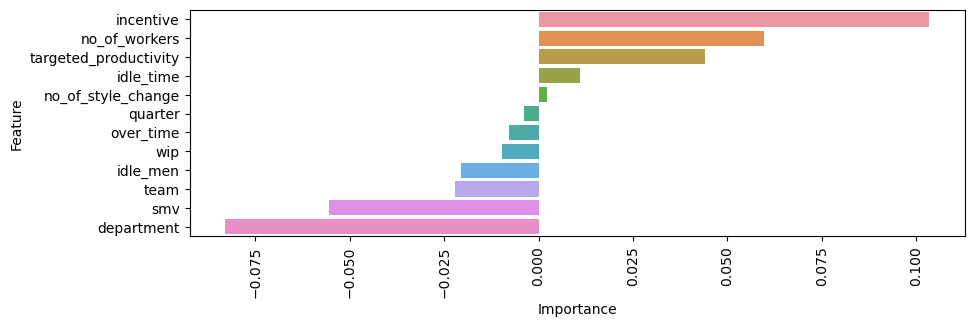

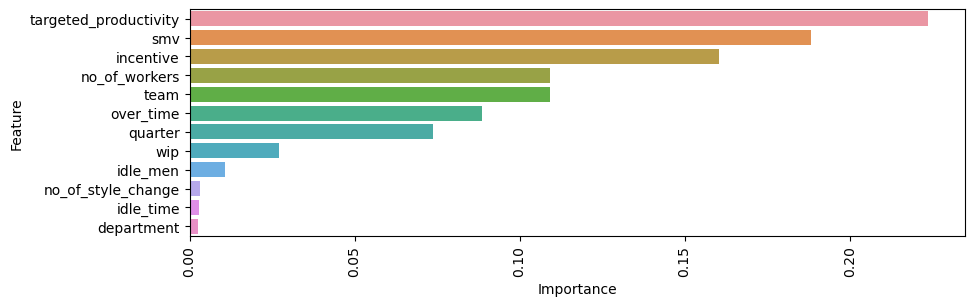

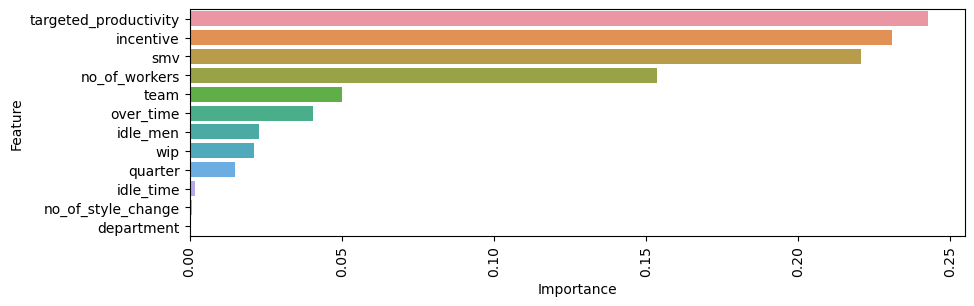

<Figure size 640x480 with 0 Axes>

In [214]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(data = importance_lr , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.barplot(data = importance_rf , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()


plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.barplot(data = importance_gb , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()

plt.tight_layout()

In [172]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 6))
# plot_tree(dt, filled=True)
# plt.show()

In [215]:
gb.predict(ss.transform([X.iloc[0]]))

array([0.93612771])

In [67]:
# crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
# crossvalidation

In [68]:

# search_grid={'n_estimators':[500,1000,1500],
#              'learning_rate':[.001,0.01,.1],
#              'max_depth':[1,2,4],
#              'subsample':[.5,.75,1],
#              'random_state':[1]}

# search=GridSearchCV(estimator = gb,
#                     param_grid=search_grid,
#                     scoring='neg_mean_squared_error',
#                     n_jobs=1,
#                     cv=crossvalidation)


In [69]:
# st_time = time.time()
# search.fit(xtrain,ytrain)
# search.best_params_
# end_time = time.time()
# print("elapsed_time_is : " ,end_time-st_time)

#  Pickling the model file for Deployment


In [216]:
import pickle

In [217]:
pickle.dump(gb, open('gradient_model.pkl','wb'))

In [218]:
# Load the pickle file for checking
pkl_model = pickle.load(open('gradient_model.pkl' , 'rb'))

In [219]:
pkl_model.predict(ss.transform([X.iloc[0]]))

array([0.93612771])

In [ ]:
# Pending
# 1. change the encoding value and add label encoder as string in app
#2. try to visualise the scatter plot
#3. get residual and check homoscedastisity